## Ансамблевые модели

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 
sns.set(style="ticks")

### Исследование данных

In [63]:
dataset = pd.read_csv('dogs.csv')
dataset.head(5)

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4


In [64]:
print('Классы в датасете:', len(list(dataset["Classification"].unique())))
index = 1
for dog_class in list(dataset["Classification"].unique()):
    print(str(index) + '.', dog_class)
    index += 1

Классы в датасете: 6
1. Brightest Dogs
2. Excellent Working Dogs
3. Above Average Working Dogs
4. Average Working/Obedience Intelligence
5. Fair Working/Obedience Intelligence
6. Lowest Degree of Working/Obedience Intelligence 


In [65]:
print('Число пород в датасете:', len(list(dataset["Breed"].unique())))
print(dataset.shape)

Число пород в датасете: 136
(136, 5)


Заметим, что число пород совпадает с общим количеством записей в датасете. Поэтому они не несут никакой информативности и их можно удалить

In [66]:
dataset = dataset.drop(columns=["Breed"], axis=1)

In [67]:
dataset["obey"].unique()

array(['95%', '85%', '70%', '50%', '30%', ' '], dtype=object)

Кодирование категориальных признаков

In [68]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
new_column = ord_enc.fit_transform(dataset[['Classification']])
dataset = dataset.drop(columns=['Classification'], axis=1)
dataset['Classification'] = new_column

In [69]:
dataset.loc[dataset['obey'] == '95%', 'obey'] = 95
dataset.loc[dataset['obey'] == '85%', 'obey'] = 85
dataset.loc[dataset['obey'] == '70%', 'obey'] = 70
dataset.loc[dataset['obey'] == '50%', 'obey'] = 50
dataset.loc[dataset['obey'] == '30%', 'obey'] = 30
dataset.loc[dataset['obey'] == ' ', 'obey'] = 0

In [70]:
new_column = pd.to_numeric(dataset['obey'], downcast='integer')
dataset = dataset.drop(columns=['obey'], axis=1)
dataset['obey'] = new_column

In [71]:
dataset.head(10)

,reps_lower,reps_upper,Classification,obey
0,1,4,2.0,95
1,1,4,2.0,95
2,1,4,2.0,95
3,1,4,2.0,95
4,1,4,2.0,95
5,1,4,2.0,95
6,1,4,2.0,95
7,1,4,2.0,95
8,1,4,2.0,95
9,1,4,2.0,95


### Обучающая и тестовая выборки

In [72]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(dataset, test_size=0.33, random_state=42)
print(data_train.shape)
print(data_test.shape)

(91, 4)
(45, 4)


### Бэггинг

Обучим классификатор на 3 деревьях

In [73]:
from sklearn.ensemble import BaggingClassifier

bc1 = BaggingClassifier(n_estimators=3, oob_score=True, random_state=10)
bc1.fit(data_train[["obey", "reps_lower"]], data_train["Classification"])

C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_bagging.py:791: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_bagging.py:797: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(n_estimators=3, oob_score=True, random_state=10)

Объекты, использованные в обучающей выборке каждого дерева:

In [74]:
bc1.estimators_samples_

[array([37,  9, 49, 52, 14, 10, 26, 74, 24, 10, 63, 51, 50, 44, 67, 34, 24,
        43, 59, 21, 58, 58, 46, 75, 27, 74, 19, 37, 45, 59, 54,  4, 44, 14,
        69, 28, 75, 74, 23, 39, 60, 64, 43,  0, 50, 73, 22, 78, 43, 42, 77,
        28, 50,  4, 14, 56, 42, 68, 76, 43, 39, 68, 63, 43, 11, 84, 80, 48,
        31, 56, 54, 71, 50, 82, 10,  8, 77,  4, 79, 62, 44, 60, 90, 74, 25,
        67,  9, 69, 25, 88, 14]),
 array([87, 46,  1, 44,  8, 87, 21, 61, 68, 87, 55, 31, 34, 17, 58, 34, 38,
        79, 21, 80, 88, 38, 70, 22, 88, 39, 52, 24, 19, 44, 19, 30, 15, 49,
        50, 39, 52, 41,  2, 14, 47, 33, 18, 13, 10, 13, 62, 24, 15, 63, 57,
        17, 48, 62, 52, 23, 52,  0, 87, 16, 67, 50, 59, 82, 43, 55,  7, 82,
         4, 51, 35, 78, 52, 35, 63, 81, 58, 67, 20, 81, 54, 88, 49, 49, 41,
        16, 86, 13, 67, 20, 68]),
 array([25, 54,  3, 76, 41, 54, 55, 77, 38, 13, 40, 18, 72, 51, 50, 29, 42,
        61, 54, 45, 21, 42, 82,  7, 28, 72, 71, 51, 81, 88, 72, 71, 24, 39,
         1, 66, 53, 

Построим бинарную матрицу, чтобы наглядно показать данные, попавшие в обучающую выборку. 1 = попадание в выборку

In [75]:
bin_array = np.zeros((3, data_train[["obey", "reps_lower"]].shape[0]))
for i in range(3):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 1.

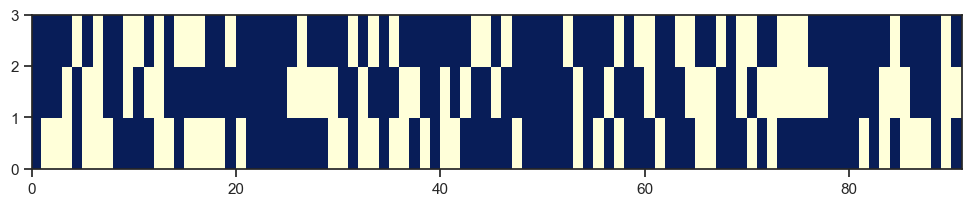

In [76]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

Синим показаны данные, попавшие в обучающую выборку

#### Оценка Out-of-bag error

In [77]:
for i in range(3):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 40.660000000000004%
Для модели № 2 размер OOB составляет 39.56%
Для модели № 3 размер OOB составляет 32.97%


In [78]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.8241758241758241, 0.17582417582417587)

In [79]:
# Параметр oob_decision_function_ возвращает вероятности 
# принадлежности объекта к классам на основе oob
# В данном примере три класса, 
# значения nan могут возвращаться в случае маленькой выборки
bc1.oob_decision_function_[55:70]

array([[ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan, nan],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan, nan],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [nan, nan, nan, nan, nan, nan],
       [ 0.,  0.,  0.,  0.,  1.,  0.]])

#### Визуализация обученных деревьев

[Text(0.5555555555555556, 0.875, 'x[1] <= 21.0\ngini = 0.792\nsamples = 54\nvalue = [23, 27, 7, 13, 14, 7]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 10.5\ngini = 0.596\nsamples = 23\nvalue = [23, 0, 7, 13, 0, 0]'),
 Text(0.2222222222222222, 0.375, 'x[0] <= 90.0\ngini = 0.455\nsamples = 10\nvalue = [0, 0, 7, 13, 0, 0]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 13, 0, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 7, 0, 0, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [23, 0, 0, 0, 0, 0]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= 40.0\ngini = 0.577\nsamples = 31\nvalue = [0, 27, 0, 0, 14, 7]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 15.0\ngini = 0.444\nsamples = 14\nvalue = [0, 0, 0, 0, 14, 7]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 7]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 14, 0]'),
 Text(0.888

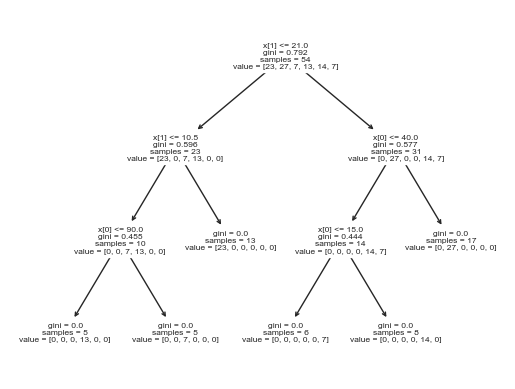

In [80]:
from sklearn import tree

tree.plot_tree(bc1.estimators_[0]) 

[Text(0.5, 0.9, 'x[1] <= 33.5\ngini = 0.789\nsamples = 55\nvalue = [16, 30, 9, 10, 19, 7]'),
 Text(0.25, 0.7, 'x[0] <= 60.0\ngini = 0.684\nsamples = 42\nvalue = [16, 30, 9, 10, 0, 0]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [0, 30, 0, 0, 0, 0]'),
 Text(0.375, 0.5, 'x[1] <= 10.5\ngini = 0.643\nsamples = 23\nvalue = [16, 0, 9, 10, 0, 0]'),
 Text(0.25, 0.3, 'x[0] <= 90.0\ngini = 0.499\nsamples = 11\nvalue = [0, 0, 9, 10, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 10, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 9, 0, 0, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [16, 0, 0, 0, 0, 0]'),
 Text(0.75, 0.7, 'x[1] <= 61.0\ngini = 0.393\nsamples = 13\nvalue = [0, 0, 0, 0, 19, 7]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 19, 0]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 7]')]

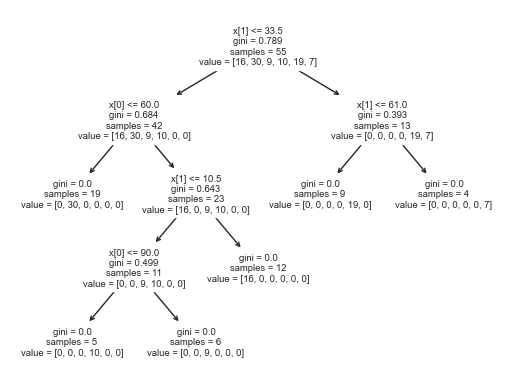

In [81]:
tree.plot_tree(bc1.estimators_[1]) 

[Text(0.4444444444444444, 0.9, 'x[0] <= 40.0\ngini = 0.782\nsamples = 61\nvalue = [19, 29, 7, 7, 21, 8]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= 15.0\ngini = 0.4\nsamples = 18\nvalue = [0, 0, 0, 0, 21, 8]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 8]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 21, 0]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 60.0\ngini = 0.662\nsamples = 43\nvalue = [19, 29, 7, 7, 0, 0]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [0, 29, 0, 0, 0, 0]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= 10.5\ngini = 0.579\nsamples = 21\nvalue = [19, 0, 7, 7, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 3.0\ngini = 0.5\nsamples = 9\nvalue = [0, 0, 7, 7, 0, 0]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 7, 0, 0, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 7, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0

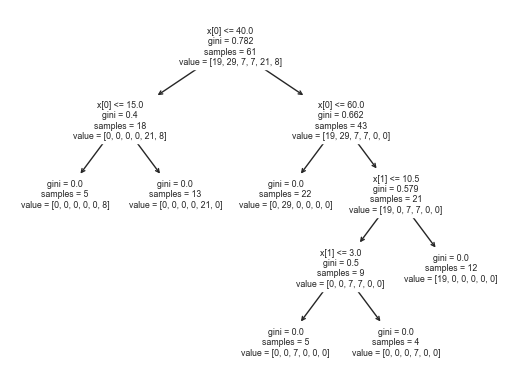

In [82]:
tree.plot_tree(bc1.estimators_[2]) 

#### Визуализация результатов классификации

In [83]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_cl(clf):
    title = clf.__repr__
    clf.fit(data_train[["obey", "reps_lower"]], data_train[['Classification']])
    fig, ax = plt.subplots(figsize=(5,5))
    X0 = data_train["obey"]
    X1 = data_train["reps_lower"]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=data_train['Classification'], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('obey')
    ax.set_ylabel('reps_lower')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


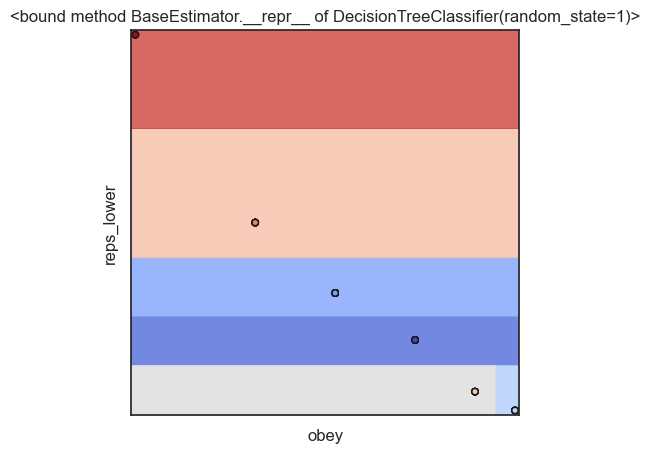

In [84]:
plot_cl(DecisionTreeClassifier(random_state=1))

C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


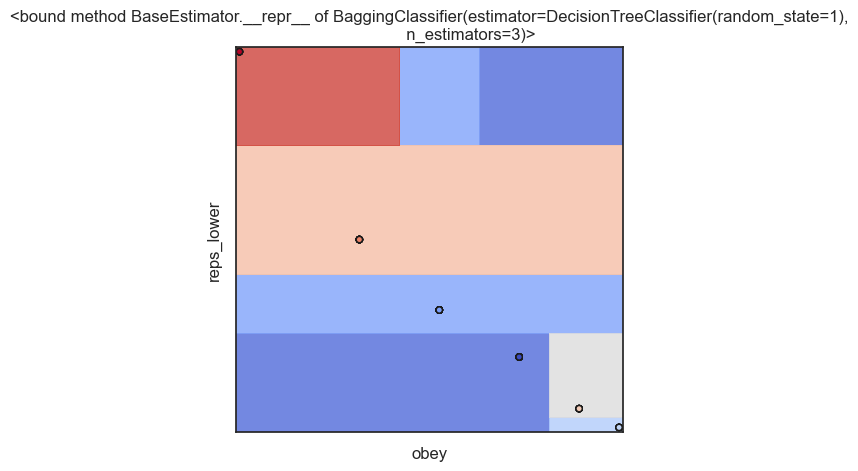

In [85]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=3))

C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_bagging.py:804: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


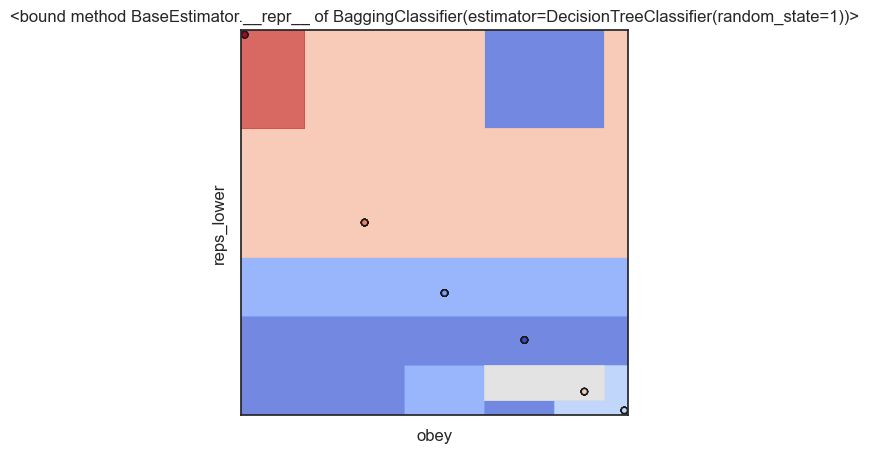

In [86]:
plot_cl(BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=10))

### Бустинг

In [87]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

Как всегда обучим модель на 3 деревьях

In [88]:
ab1 = AdaBoostClassifier(n_estimators=3, algorithm='SAMME', random_state=10)
ab1.fit(data_train[["obey", "reps_lower"]], data_train[['Classification']])

C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME', n_estimators=3, random_state=10)

[Text(0.5, 0.75, 'x[1] <= 21.0\ngini = 0.784\nsamples = 91\nvalue = [0.209, 0.341, 0.088, 0.11, 0.176, 0.077]'),
 Text(0.25, 0.25, 'gini = 0.617\nsamples = 37\nvalue = [0.209, 0.0, 0.088, 0.11, 0.0, 0.0]'),
 Text(0.75, 0.25, 'gini = 0.566\nsamples = 54\nvalue = [0.0, 0.341, 0.0, 0.0, 0.176, 0.077]')]

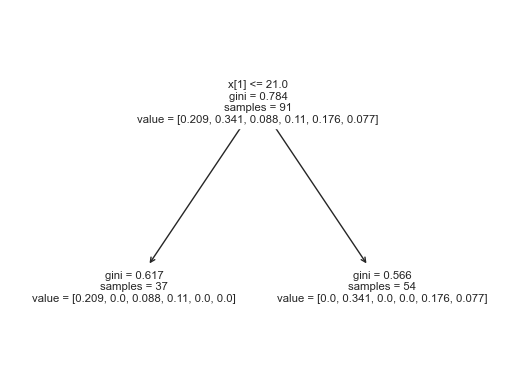

In [89]:
tree.plot_tree(ab1.estimators_[0]) 

[Text(0.5, 0.75, 'x[1] <= 33.5\ngini = 0.792\nsamples = 91\nvalue = [0.063, 0.103, 0.163, 0.203, 0.325, 0.142]'),
 Text(0.25, 0.25, 'gini = 0.709\nsamples = 68\nvalue = [0.063, 0.103, 0.163, 0.203, 0.0, 0.0]'),
 Text(0.75, 0.25, 'gini = 0.423\nsamples = 23\nvalue = [0.0, 0.0, 0.0, 0.0, 0.325, 0.142]')]

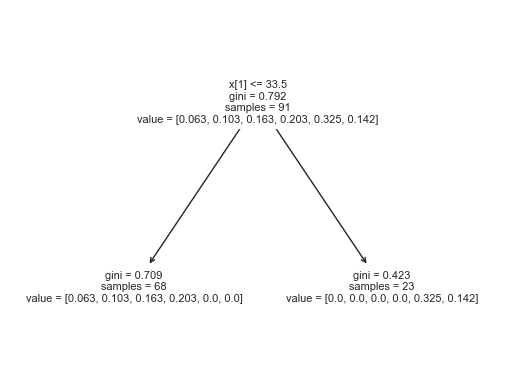

In [90]:
tree.plot_tree(ab1.estimators_[1]) 

[Text(0.5, 0.75, 'x[1] <= 3.0\ngini = 0.794\nsamples = 91\nvalue = [0.112, 0.183, 0.287, 0.064, 0.103, 0.251]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0.0, 0.0, 0.287, 0.0, 0.0, 0.0]'),
 Text(0.75, 0.25, 'gini = 0.756\nsamples = 83\nvalue = [0.112, 0.183, 0.0, 0.064, 0.103, 0.251]')]

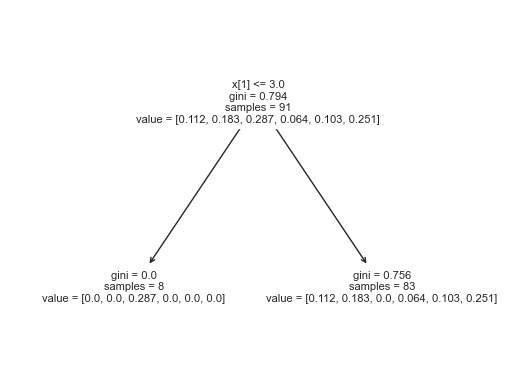

In [91]:
tree.plot_tree(ab1.estimators_[2]) 

#### Визуализация классификации

C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


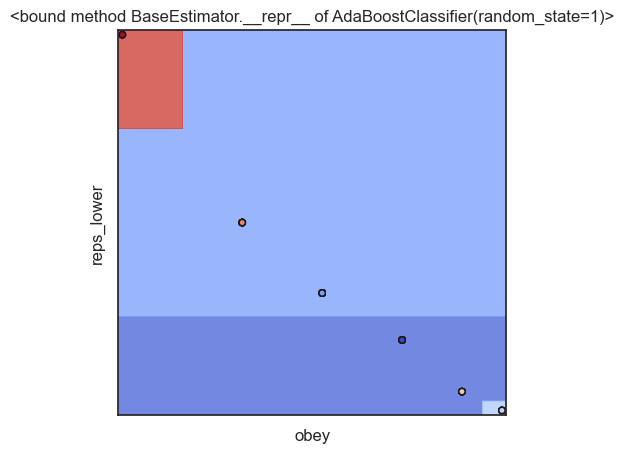

In [92]:
plot_cl(AdaBoostClassifier(random_state=1))

#### Визуализация важности признаков

In [93]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

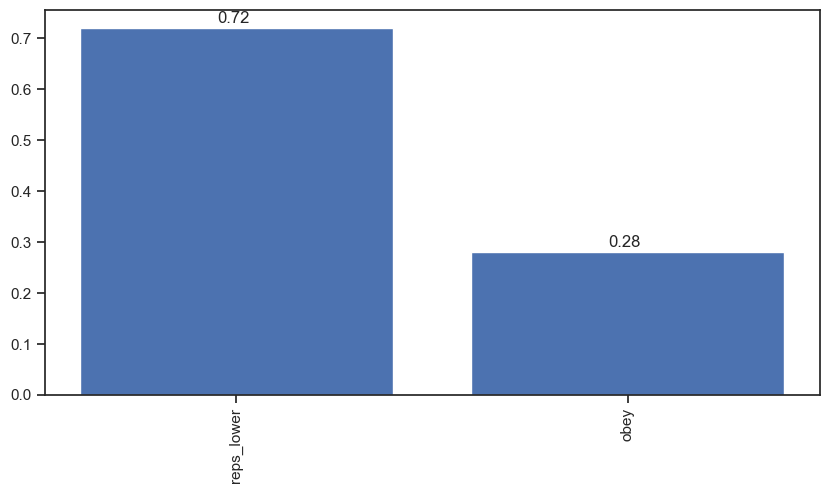

In [94]:
dataset_x_ds = pd.DataFrame(data=dataset[["obey", "reps_lower"]], columns=['obey', 'reps_lower'])
ab2 = AdaBoostClassifier(random_state=1)
ab2.fit(dataset_x_ds, dataset["Classification"])
_,_ = draw_feature_importances(ab2, dataset_x_ds)

#### GradientBoostingClassifier (актуальный алгоритм для бустинга)

In [95]:
plot_cl(GradientBoostingClassifier(random_state=1))

C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ander\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


#### Важность признаков

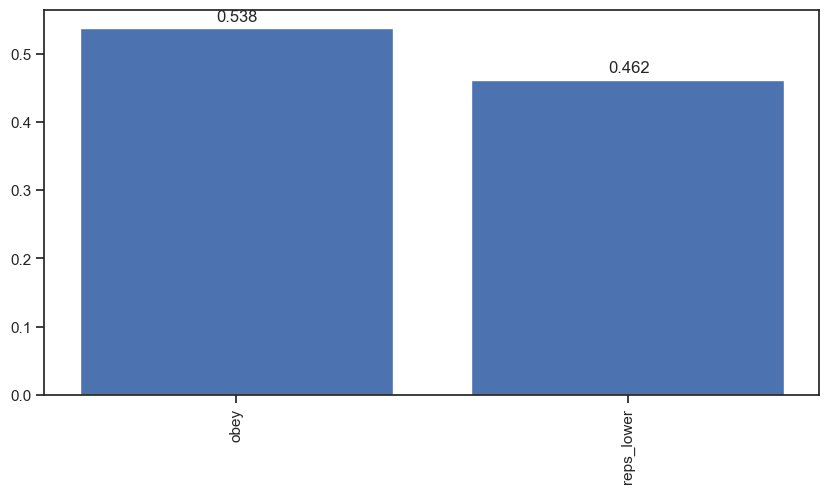

In [ ]:
dataset_gb_cl = GradientBoostingClassifier(random_state=1)
dataset_gb_cl.fit(dataset_x_ds, dataset["Classification"])
_,_ = draw_feature_importances(dataset_gb_cl, dataset_x_ds)

### Стекинг

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [ ]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(),
              LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
clf.fit(data_train[["obey", "reps_lower"]], data_train['Classification'])

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

Средняя точность:

In [ ]:
clf.fit(data_train[["obey", "reps_lower"]], data_train['Classification']).score(data_test[["obey", "reps_lower"]], data_test['Classification'])

1.0

In [ ]:
clf.decision_function(dataset[["obey", "reps_lower"]])[55:65]

array([[ 3.59566403,  0.12338979, -0.15650544,  0.33500369, -1.76139169,
        -2.13616037],
       [ 3.59566403,  0.12338979, -0.15650544,  0.33500369, -1.76139169,
        -2.13616037],
       [ 3.59566403,  0.12338979, -0.15650544,  0.33500369, -1.76139169,
        -2.13616037],
       [ 3.59566403,  0.12338979, -0.15650544,  0.33500369, -1.76139169,
        -2.13616037],
       [ 3.59566403,  0.12338979, -0.15650544,  0.33500369, -1.76139169,
        -2.13616037],
       [ 3.59566403,  0.12338979, -0.15650544,  0.33500369, -1.76139169,
        -2.13616037],
       [ 0.34065606,  4.36159816, -3.51937725, -0.88997152,  1.02617066,
        -1.31907611],
       [ 0.34065606,  4.36159816, -3.51937725, -0.88997152,  1.02617066,
        -1.31907611],
       [ 0.34065606,  4.36159816, -3.51937725, -0.88997152,  1.02617066,
        -1.31907611],
       [ 0.34065606,  4.36159816, -3.51937725, -0.88997152,  1.02617066,
        -1.31907611]])